## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

#### 1. Dynamic Programming

In [36]:
from collections import defaultdict
from functools import wraps

In [37]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]
price = defaultdict(int)
for i, p in enumerate(original_price): 
    price[i + 1] = p

In [38]:
solution = {}

def memo(f): 
    memo.already_computed = {}
    @wraps(f)
    def _wrap(arg):
        result = None
        if arg in memo.already_computed: 
            result = memo.already_computed[arg]
        else:
            result = f(arg)
            memo.already_computed[arg] = result
        return result
    return _wrap

@memo
def r(n):
    """
    Args: n is the iron length
    Return: the max revenue 
    """
    max_price, max_split = max(
        [(price[n], 0)] + [(r(i) + r(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    solution[n] = (max_split, n - max_split)
    return max_price

In [39]:
r(38)

118

In [40]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (0, 11),
 12: (1, 11),
 13: (2, 11),
 14: (3, 11),
 15: (2, 13),
 16: (2, 14),
 17: (6, 11),
 18: (1, 17),
 19: (2, 17),
 20: (3, 17),
 21: (10, 11),
 22: (11, 11),
 23: (1, 22),
 24: (2, 22),
 25: (3, 22),
 26: (2, 24),
 27: (2, 25),
 28: (6, 22),
 29: (1, 28),
 30: (2, 28),
 31: (3, 28),
 32: (10, 22),
 33: (11, 22),
 34: (1, 33),
 35: (2, 33),
 36: (3, 33),
 37: (2, 35),
 38: (2, 36)}

In [41]:
def not_cut(split): return split == 0

def parse_solution(target_length, revenue_solution):
    left, right = revenue_solution[target_length]
    if not_cut(left): return [right]
    return parse_solution(left, revenue_solution) + parse_solution(right, revenue_solution)

In [42]:
parse_solution(38, solution)

[2, 3, 11, 11, 11]

#### 2. Gradient Descent Programming

In [59]:
import random
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
data = load_boston()
X, y = data['data'], data['target']
X_rm = X[:, 5]

In [45]:
def draw_rm_and_price():
    plt.scatter(X_rm, y)

def draw_result(k, b):
    print('k: {}, b: {}'.format(k, b))
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    draw_rm_and_price()
    plt.scatter(X_rm, price_by_random_k_and_b)

In [46]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

In [47]:
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [48]:
def partial_k(x, y, y_hat):
    return -2 / len(y) * sum([(y_i - y_hat_i) * x_i for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat))])

def partial_b(x, y, y_hat):
    return -2 / len(y) * sum([y_i - y_hat_i for y_i, y_hat_i in zip(list(y), list(y_hat))])

In [49]:
def gradient_descent_optimize(trying_times, loss, partial_k, partial_b, learning_rate):
    min_loss = float('inf') 
    current_k = random.random() * 200 - 100
    current_b = random.random() * 200 - 100
    print('initial k: {}, b: {}'.format(current_k, current_b))
    update_time = 0
    for i in range(trying_times):
        price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
        current_loss = loss(y, price_by_k_and_b)
        k_gradient = partial_k(X_rm, y, price_by_k_and_b)
        b_gradient = partial_b(X_rm, y, price_by_k_and_b)
        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = current_k, current_b
            if i % 50 == 0: 
                print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}, k_gradient: {}, b_gradient: {}'.format(i, best_k, best_b, min_loss, k_gradient, b_gradient))
        current_k = current_k + (-1 * k_gradient) * learning_rate
        current_b = current_b + (-1 * b_gradient) * learning_rate
    return best_k, best_b

initial k: -29.51331234347421, b: -37.78069099319363
When time is : 0, get best_k: -29.51331234347421 best_b: -37.78069099319363, and the loss is: 61192.912365527714, k_gradient: -3127.500544205761, b_gradient: -491.58774991151256
When time is : 50, get best_k: -16.64074914828973 best_b: -35.75741473350668, and the loss is: 26897.149655895733, k_gradient: -2072.5392250303144, b_gradient: -325.7424907725078
When time is : 100, get best_k: -8.110326227214527 best_b: -34.416744895408854, and the loss is: 11836.293788754125, k_gradient: -1373.436283185042, b_gradient: -215.83997263942587
When time is : 150, get best_k: -2.457357658987149 best_b: -33.52842542658359, and the loss is: 5222.375281158727, k_gradient: -910.1539669800983, b_gradient: -143.00965239277426
When time is : 200, get best_k: 1.2887762532219822 best_b: -32.9398699899562, and the loss is: 2317.8977051158017, k_gradient: -603.1455254964015, b_gradient: -94.74637751093123
When time is : 250, get best_k: 3.7712868506281017 b

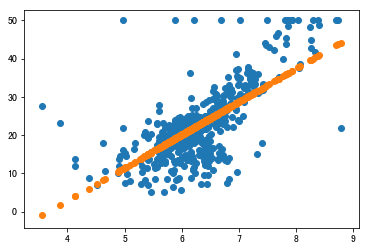

In [60]:
k, b = gradient_descent_optimize(2000, loss, partial_k, partial_b, 1e-04)
draw_result(k, b)

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [51]:
def loss_2(y, y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

def partial_k_2(x, y, y_hat):
    return sum([(y_hat_i - y_i) * x_i / abs(y_hat_i - y_i) for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat))]) / len(y)

def partial_b_2(x, y, y_hat):
    return sum([(y_hat_i - y_i) / abs(y_hat_i - y_i) for y_i, y_hat_i in zip(list(y), list(y_hat))]) / len(y)

initial k: 82.83572340540769, b: -46.87722204072826
When time is : 0, get best_k: 82.83572340540769 best_b: -46.87722204072826, and the loss is: 451.1822074499466, k_gradient: 6.284634387351787, b_gradient: 1.0
When time is : 50, get best_k: 51.412551468648616 best_b: -51.877222040728334, and the loss is: 248.69906053652312, k_gradient: 6.284634387351787, b_gradient: 1.0
When time is : 100, get best_k: 20.001872812522013 best_b: -56.87405998539244, and the loss is: 46.38976121475746, k_gradient: 6.235646245059297, b_gradient: 0.9881422924901185
When time is : 150, get best_k: 12.817932496316457 best_b: -57.894218088159164, and the loss is: 4.709076328559207, k_gradient: 0.008460474308299687, b_gradient: -0.02766798418972332
When time is : 200, get best_k: 12.798080322403413 best_b: -57.75232085495748, and the loss is: 4.705030071547528, k_gradient: 0.05476086956521726, b_gradient: -0.019762845849802372
When time is : 250, get best_k: 12.770500875763096 best_b: -57.612399906340876, and 

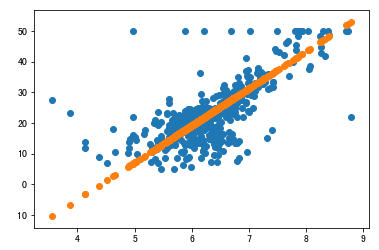

In [66]:
k, b = gradient_descent_optimize(2000, loss_2, partial_k_2, partial_b_2, 0.1)
draw_result(k, b)

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [69]:
from functools import lru_cache

In [145]:
solution = {}

@lru_cache(maxsize=2**10)
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    min_distance, operation = min(candidates, key=lambda x: x[0])
    solution[(string1, string2)] = operation
    return min_distance

In [136]:
def parse_distance(string1, string2, solution):
    if string1 == string2: return []
    operation = solution[(string1, string2)]
    split = operation.split()
    if len(split) == 0:
        string1 = string1[:-1]
        string2 = string2[:-1]
        return parse_distance(string1, string2, solution)
    if 'ADD' == split[0]: string2 = string2[:-1]
    elif 'DEL' == split[0]: string1 = string1[:-1]
    else: 
        string1 = string1[:-1]
        string2 = string2[:-1]
    return [operation] + parse_distance(string1, string2, solution)
    

In [142]:
edit_distance('ABCDEF', 'FEDCBA')

6

In [143]:
solution

{('A', 'F'): 'SUB A => F',
 ('A', 'FE'): 'ADD E',
 ('A', 'FED'): 'ADD D',
 ('A', 'FEDC'): 'ADD C',
 ('A', 'FEDCB'): 'ADD B',
 ('A', 'FEDCBA'): '',
 ('AB', 'F'): 'DEL B',
 ('AB', 'FE'): 'SUB B => E',
 ('AB', 'FED'): 'ADD D',
 ('AB', 'FEDC'): 'ADD C',
 ('AB', 'FEDCB'): '',
 ('AB', 'FEDCBA'): 'ADD A',
 ('ABC', 'F'): 'DEL C',
 ('ABC', 'FE'): 'DEL C',
 ('ABC', 'FED'): 'SUB C => D',
 ('ABC', 'FEDC'): '',
 ('ABC', 'FEDCB'): 'ADD B',
 ('ABC', 'FEDCBA'): 'ADD A',
 ('ABCD', 'F'): 'DEL D',
 ('ABCD', 'FE'): 'DEL D',
 ('ABCD', 'FED'): '',
 ('ABCD', 'FEDC'): 'DEL D',
 ('ABCD', 'FEDCB'): 'SUB D => B',
 ('ABCD', 'FEDCBA'): 'ADD A',
 ('ABCDE', 'F'): 'DEL E',
 ('ABCDE', 'FE'): '',
 ('ABCDE', 'FED'): 'DEL E',
 ('ABCDE', 'FEDC'): 'SUB E => C',
 ('ABCDE', 'FEDCB'): 'DEL E',
 ('ABCDE', 'FEDCBA'): 'SUB E => A',
 ('ABCDEF', 'F'): '',
 ('ABCDEF', 'FE'): 'DEL F',
 ('ABCDEF', 'FED'): 'DEL F',
 ('ABCDEF', 'FEDC'): 'DEL F',
 ('ABCDEF', 'FEDCB'): 'SUB F => B',
 ('ABCDEF', 'FEDCBA'): 'DEL F'}

In [144]:
parse_distance('ABCDEF', 'FEDCBA', solution)

['DEL F', 'SUB E => A', 'SUB D => B', 'ADD D', 'SUB B => E', 'SUB A => F']

In [146]:
edit_distance('ATCGGAA', 'ATCGGGA')

1

In [147]:
solution

{('A', 'A'): '',
 ('A', 'AT'): 'ADD T',
 ('A', 'ATC'): 'ADD C',
 ('A', 'ATCG'): 'ADD G',
 ('A', 'ATCGG'): 'ADD G',
 ('A', 'ATCGGG'): 'ADD G',
 ('A', 'ATCGGGA'): 'ADD A',
 ('AT', 'A'): 'DEL T',
 ('AT', 'AT'): '',
 ('AT', 'ATC'): 'ADD C',
 ('AT', 'ATCG'): 'ADD G',
 ('AT', 'ATCGG'): 'ADD G',
 ('AT', 'ATCGGG'): 'ADD G',
 ('AT', 'ATCGGGA'): 'ADD A',
 ('ATC', 'A'): 'DEL C',
 ('ATC', 'AT'): 'DEL C',
 ('ATC', 'ATC'): '',
 ('ATC', 'ATCG'): 'ADD G',
 ('ATC', 'ATCGG'): 'ADD G',
 ('ATC', 'ATCGGG'): 'ADD G',
 ('ATC', 'ATCGGGA'): 'ADD A',
 ('ATCG', 'A'): 'DEL G',
 ('ATCG', 'AT'): 'DEL G',
 ('ATCG', 'ATC'): 'DEL G',
 ('ATCG', 'ATCG'): '',
 ('ATCG', 'ATCGG'): 'ADD G',
 ('ATCG', 'ATCGGG'): 'ADD G',
 ('ATCG', 'ATCGGGA'): 'ADD A',
 ('ATCGG', 'A'): 'DEL G',
 ('ATCGG', 'AT'): 'DEL G',
 ('ATCGG', 'ATC'): 'DEL G',
 ('ATCGG', 'ATCG'): 'DEL G',
 ('ATCGG', 'ATCGG'): '',
 ('ATCGG', 'ATCGGG'): 'ADD G',
 ('ATCGG', 'ATCGGGA'): 'ADD A',
 ('ATCGGA', 'A'): 'DEL A',
 ('ATCGGA', 'AT'): 'DEL A',
 ('ATCGGA', 'ATC'): 'DEL 

In [148]:
parse_distance('ATCGGAA', 'ATCGGGA', solution)

['SUB A => G']

### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gredient to fit a target function?¶

Ans: 通过计算导数得到函数变化情况，使得结果更快收敛，学习速度更快

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans: 梯度即导数，下降就是沿导数减小的方向优化


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans: 通过计算导数使得函数不断向最优值方向变化，得到最优值所需的学习次数更少

4. Using the simple words to describe: What's the machine leanring.¶

Ans: 用计算手段，学习经验改善系统性能

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problme? 

Ans: 动态规划缓存已计算过的结果，当需要已计算过的结果不需要再重复计算，提高计算效率

2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

Ans: 机器学习不是银弹，动态规划简单，有自己的适用场景

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

In [ ]:
Ans: 编辑距离，N皇后问题，斐波那契数列

4. Can you catch up at least 3 problems wich could sloved by Edit Distance? 

Ans: 文本相似度计算

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

Ans: 
    1. 阶段，将问题分解为多个阶段
    2. 决策，根据当前阶段的状态做出不同的决定
    3. 最优指标函数，衡量所选定策略优劣

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans: 占用内存空间，当问题比较复杂，数据量较大，可能内存溢出

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [7]:
import random
import matplotlib.pylab as plt

In [8]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

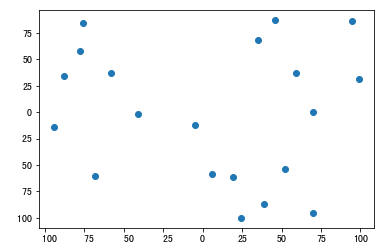

In [9]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [153]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [154]:
import matplotlib.pyplot as plt

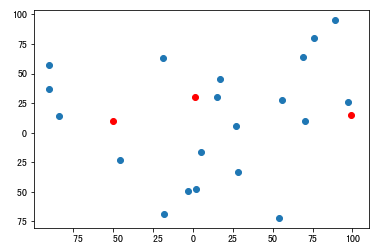

In [156]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

In [17]:
import math
import random
import time
from functools import wraps
from functools import lru_cache
import matplotlib.pyplot as plt
import networkx as nx

In [18]:
def to_bit_map(length):
    """
    给定长度，转换成bitmap，从右向左
    :param length:
    :return:
    """
    return (1 << length) - 1


def bit_map_set(bm, i):
    """
    将bm第i位设为1
    :param bm:
    :param i:
    :return:
    """
    return bm | (1 << i)


def bit_map_clean(bm, i):
    """
    将bm第i位设为0
    :param bm:
    :param i:
    :return:
    """
    return bm & (~(1 << i))


def bit_map_has(bm, i):
    """
    检查bm第i位是否为1
    :param bm:
    :param i:
    :return:
    """
    return bool(bm & (1 << i))


def bit_map_all(bm):
    """
    获取所有为1的索引
    :param bm:
    :return:
    """
    return [i for i in range(len(str(bin(bm))[2:])) if bit_map_has(bm, i)]


def bit_map_str(bm, length=None):
    s = str(bin(bm))[2:]
    if not length:
        length = len(s)
    return '0' * (length - len(s)) + s


def distance(p1, p2):
    """
    计算两点距离
    :param p1: 数组points的索引
    :param p2: 数组points的索引
    :return:
    """
    return math.sqrt((points[p1][0] - points[p2][0]) ** 2 + (points[p1][1] - points[p2][1]) ** 2)


def cache_print(func):
    """
    计算函数耗时
    :param func:
    :return:
    """

    @wraps(func)
    def _warp(*args, **kwargs):
        key = tuple(args)
        if key in cache:
            num = cache[key] + 1
            cache[key] = num
            print(key, num)
        else:
            cache[key] = 1
        result = func(*args, **kwargs)
        return result

    return _warp


@lru_cache(maxsize=2 ** 30)
@cache_print
def search(p, bm):
    """
    搜索方案
    :param p:
    :param bm:
    :return:
    """
    rest = bit_map_all(bm)
    if len(rest) == 0:
        solution[(p, bm)] = p
        return distance(0, p)
    min_distance, index = min([(distance(p, i) + search(i, bit_map_clean(bm, i)), i) for i in rest], key=lambda x: x[0])
    solution[(p, bm)] = index
    return min_distance


def parse_solution(status, solution_map):
    """
    解析最优方案
    :param status:
    :param solution_map:
    :return:
    """
    if status[1] == 0:
        return []
    p = solution_map[status]
    return [p] + parse_solution((p, bit_map_clean(status[1], p)), solution_map)


def draw_solution(idx_path, points_coord):
    """
    画出路径
    :param idx_path: 路径连线，points的索引
    :param points_coord: 点的坐标列表
    :return:
    """
    location_map = {}
    for i, p in enumerate(points_coord):
        location_map[i] = p
    edges = [(idx_path[i - 1], idx_path[i]) for i in range(1, len(idx_path))]

    DG = nx.DiGraph()
    DG.add_edges_from(edges)
    nx.draw_networkx_nodes(DG, location_map)
    nx.draw_networkx_edges(DG, location_map, edge_color='r', arrows=True)
    nx.draw_networkx_labels(DG, location_map)
    plt.show()


def elapsed_time(func):
    """
    计算函数耗时
    :param func:
    :return:
    """

    @wraps(func)
    def _warp(*args, **kwargs):
        t0 = time.time()
        result = func(*args, **kwargs)
        name = func.__name__
        elapsed = time.time() - t0
        arg_lst = []
        if args:
            arg_lst.append(', '.join(repr(arg) for arg in args))
        if kwargs:
            pairs = ['%s=%r' % (k, w) for k, w in sorted(kwargs.items())]
            arg_lst.append(', '.join(pairs))
        arg_str = ', '.join(arg_lst)
        print('%s(%s) -> %r, elapsed time:%0.8fs' % (name, arg_str, result, elapsed))
        return result

    return _warp


@elapsed_time
def search_solution(n):
    """
    搜索最优路径
    :param n: 点的个数
    :return: 最优路径，点的索引列表
    """
    bitmap = to_bit_map(n)
    # 搜索路径
    search(0, bit_map_clean(bitmap, 0))
    # 解析路径
    return [0] + parse_solution((0, bit_map_clean(bitmap, 0)), solution) + [0]


In [19]:
latitudes = [random.randint(-100, 100) for _ in range(15)]
longitude = [random.randint(-100, 100) for _ in range(15)]

In [20]:
points = list(zip(latitudes, longitude))

In [21]:
points

[(-24, 82),
 (-37, -86),
 (56, 35),
 (96, 22),
 (89, -2),
 (-21, -54),
 (93, 62),
 (90, 38),
 (-54, 96),
 (75, -67),
 (5, -27),
 (-96, 26),
 (3, 84),
 (-81, -55),
 (40, 69)]

In [22]:
solution = {}
cache = {}

In [23]:
path = search_solution(len(points))

search_solution(15) -> [0, 8, 11, 13, 1, 5, 10, 9, 4, 3, 7, 6, 2, 14, 12, 0], elapsed time:1.87102771s


In [26]:
path

[0, 8, 11, 13, 1, 5, 10, 9, 4, 3, 7, 6, 2, 14, 12, 0]

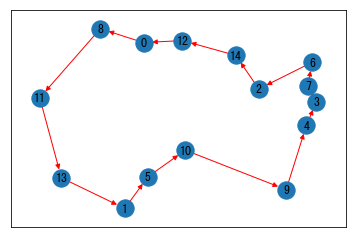

In [25]:
draw_solution(path, points)